## Данные

В этой лабораторной работе будем работать с [датасетом](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset), предназначенным для обучения алгоритма рекомендаций книг.

Для рекомендаций нам понадобятся таблицы `Books.csv` и `Ratings.scv`. Файл с рейтингами можно найти в папке с лабораторной работой на гитхабе. Файл с описаниями книг слишком большой, поэтому он располагается только по ссылке:
1. Файл с рейтингами (такой же, как в гитхабе): https://drive.google.com/file/d/1Hliaee7Y584-7lMoGeGjGabRRubzdoYn/view?usp=sharing
2. Файл с книгами:  https://drive.google.com/file/d/1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy/view?usp=sharing

In [53]:
import pandas as pd

In [54]:
!gdown 1Hliaee7Y584-7lMoGeGjGabRRubzdoYn
!gdown 1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy

Downloading...
From: https://drive.google.com/uc?id=1Hliaee7Y584-7lMoGeGjGabRRubzdoYn
To: /content/Ratings.csv
100% 22.6M/22.6M [00:00<00:00, 111MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy
To: /content/Books.csv
100% 73.3M/73.3M [00:00<00:00, 258MB/s]


Посмотрим на таблицу `Ratings`.

In [55]:
ratings = pd.read_csv("Ratings.csv")
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [56]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [57]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,1149780.0,140386.395126,80562.277718,2.0,70345.0,141010.0,211028.0,278854.0
Book-Rating,1149780.0,2.866950,3.854184,0.0,0.0,0.0,7.0,10.0


Как распределяются рейтинги?

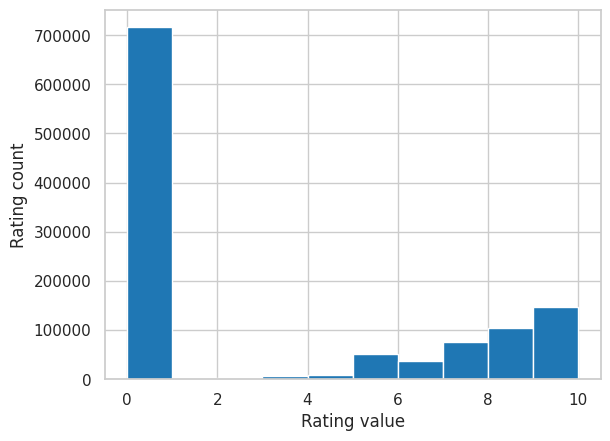

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook")
sns.set_style("whitegrid")

ratings["Book-Rating"].hist()
plt.xlabel("Rating value")
plt.ylabel("Rating count")
plt.show()


Теперь посмотрим на таблицу `Books`.

In [59]:
books = pd.read_csv("Books.csv")
books.head()

<ipython-input-59-7dc4eb500039>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv")


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [60]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


- Есть немножко пропусков.
- Проверим уязвимую часть данных – года – на адекватность.

In [61]:
books["Year-Of-Publication"].value_counts().sort_values(ascending=True)[:10]

,count
Year-Of-Publication,
2037,1
2011,1
2038,1
1938,1
1906,1
1919,1
1926,1
1926,1
2008,1


Есть года, которые еще не наступили...

Проверим, есть ли строковые данные в столбце с годом (потому что `info()` назвал тип данных столбца `object`).

In [62]:
books[books["Year-Of-Publication"].map(str).str.match("[^0-9]")]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


В трех строках пропущен автор, из-за чего смещены данные. Автор либо пропущен, либо склеен с названием. Надо проверить.

В сводке написано, что часть авторов и издателей провущена. Проверим, так ли это.

In [63]:
books[(books["Book-Author"].isnull()) | (books["Publisher"].isnull())]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


Да, это так. Основные проблемы с данными выявили. Пора их исправлять и приступать к созданию рекомендаций.

## План анализа данных

1. Обработать данные, т.к. в данных есть несколько небольших проблем:
  1. В паре строк в таблице `Books.scv` значения столбцов сдвинуты вправо, а еще есть года, которые еще не наступили.
  2. В нескольких строках в таблице `Books.scv` есть пропуски, а также для рекомендаций в рамках лабораторной не понадобятся ссылки на картинки с обложкой.
  3. Не будем использовать для обучения записи с рейтинг равным 0 из таблицы `Ratings.scv`. Считаем, что 0 означает, что пользователь еще не оценивал книгу, но проявил к ней какой-то интерес.
  4. Не будем использовать для обучения алгоритмов те книги, которым оценка поставлена всего 1 раз. Пользователей, оценивших всего одну книгу тоже брать в расчет не будем (хотя это на самом деле будет не сильно сказываться на обобщающей способности алгоритмов, можете сами проверить).
  5. Пункты 1-4 необходимы и достаточны для выполнения всех задач. Но можно сделать более глубокую обработку.
2. Обучить [SVD](https://surprise.readthedocs.io/en/stable/getting_started.html) на следующих записях: у книги есть хотя бы одна оценка, пользователь оценил хотя бы одну книгу.
   - МАЕ должно быть ниже 1.3 (для этого есть тест)
   - **Сохранить модель.**
3. Научить линейную регрессию ([SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)) предсказывать средний рейтинг книги по следующим столбцам: автор, издатель, год издания, векторизованное название (для векторизации можно использовать [tf-idf](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting), [word2vec](https://radimrehurek.com/gensim/models/word2vec.html) или более сложный алгоритм. Для достижения требуемой тестом точности достаточно будет tf-idf. Собрав полностью датасет, не забудьте нормализовать данные ([StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)).
   - МАЕ должно быть ниже 1.5 (для этого есть тест)
   - **Сохранить модель.**
4. В файле `personal_recommendation.py` создайте рекомендацию для пользователя, у которого в исходном датасете было больше всего 0 среди рейтингов книг.
   Алгоритм такой:
   1. Находим нужного пользователя.
   2. Делаем предсказание SVD для книг, которым он "поставил" 0.
   3. Берем те книги, для которых предсказали рейтинг не ниже 8. Считаем, что 8 означет, что книга ему точно понравится.
   4. Делаем предсказание LinReg для этих же книг.
   5. Сортируем полученный на шаге 3 список по убыванию рейтинга линейной модели.
   6. В конце файла комментарием записываем полученную рекомендацию.

- То есть идея в том, чтобы сделать для пользователя индивидуальную рекомендацию, показывая в начале списка те книги, которые в целом могли бы иметь высокий рейтинг.
- Обязательно сохраняйте готовую модель и добавляйте ее в свой репозиторий, потому что файл с сохраненной моделью используется в тестах.

## Анализ

1. Обработать данные, т.к. в данных есть несколько небольших проблем:
  1. В паре строк в таблице `Books.scv` значения столбцов сдвинуты вправо, а еще есть года, которые еще не наступили.
  2. В нескольких строках в таблице `Books.scv` есть пропуски, а также для рекомендаций в рамках лабораторной не понадобятся ссылки на картинки с обложкой.
  3. Не будем использовать для обучения записи с рейтинг равным 0 из таблицы `Ratings.scv`. Считаем, что 0 означает, что пользователь еще не оценивал книгу, но проявил к ней какой-то интерес.
  4. Не будем использовать для обучения алгоритмов те книги, которым оценка поставлена всего 1 раз. Пользователей, оценивших всего одну книгу тоже брать в расчет не будем (хотя это на самом деле будет не сильно сказываться на обобщающей способности алгоритмов, можете сами проверить).
  5. Пункты 1-4 необходимы и достаточны для выполнения всех задач. Но можно сделать более глубокую обработку.

In [64]:
books = books[books['Year-Of-Publication'].map(str).str.match('[0-9]')]
books = books[books['Year-Of-Publication'].astype(int) <= 2024]

In [65]:
books.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], inplace=True)
books = books.dropna()

In [66]:
ratings = ratings[ratings['Book-Rating'] > 0]

In [67]:
ratings = ratings[ratings.duplicated(subset=['ISBN'], keep=False)]

In [68]:
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

def title_preprocessing(text):
  stop_words = stopwords.words('english')
  text = nltk.word_tokenize(text.lower())
  text = [i for i in text if i not in stop_words and i not in string.punctuation]
  return ' '.join(text)

books["Book-Title"] = books["Book-Title"].apply(title_preprocessing)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


2. Обучить [SVD](https://surprise.readthedocs.io/en/stable/getting_started.html) на следующих записях: у книги есть хотя бы одна оценка, пользователь оценил хотя бы одну книгу.
   - МАЕ должно быть ниже 1.3 (для этого есть тест)
   - **Сохранить модель.**

In [69]:
!pip install surprise

In [89]:
import pickle
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings[['User-ID', 'ISBN', 'Book-Rating']], reader)

train_data, test_data = train_test_split(data, random_state=161, test_size=0.2)

svd = SVD()
svd.fit(train_data)

mae = accuracy.mae(svd.test(test_data))

with open('svd.pkl', 'wb') as f:
  pickle.dump(svd, f)

MAE:  1.2626


3. Научить линейную регрессию ([SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)) предсказывать средний рейтинг книги по следующим столбцам: автор, издатель, год издания, векторизованное название (для векторизации можно использовать [tf-idf](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting), [word2vec](https://radimrehurek.com/gensim/models/word2vec.html) или более сложный алгоритм. Для достижения требуемой тестом точности достаточно будет tf-idf. Собрав полностью датасет, не забудьте нормализовать данные ([StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)).
   - МАЕ должно быть ниже 1.5 (для этого есть тест)
   - **Сохранить модель.**

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

mean_rating = ratings.groupby('ISBN')['Book-Rating'].mean().reset_index()
data = books.merge(mean_rating, on='ISBN', how='inner')
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

preprocessor = ColumnTransformer((
    ('title', vectorizer, 'Book-Title'),
    ('author', OneHotEncoder(handle_unknown='ignore'), ['Book-Author']),
    ('year', StandardScaler(), ['Year-Of-Publication']),
    ('publisher', OneHotEncoder(handle_unknown='ignore'), ['Publisher'])
))
pipeline = Pipeline((
    ('preprocessor', preprocessor),
    ('regressor', SGDRegressor(random_state=161, max_iter=1000, tol=1e-3))
))

x_train, x_test, y_train, y_test = train_test_split(
    data[['Book-Title', 'Book-Author', 'Publisher', 'Year-Of-Publication']],
    data['Book-Rating'],
    random_state=161,
    test_size=0.2
)

pipeline.fit(x_train, y_train)

with open('linreg.pkl', 'wb') as f:
  pickle.dump(pipeline, f)

mae = mean_absolute_error(y_test, pipeline.predict(x_test))
print('MAE: ', mae)

MAE:  0.9444476632070594


4. Создайте рекомендацию для пользователя, у которого в исходном датасете было больше всего 0 среди рейтингов книг.
   Алгоритм такой:
   1. Находим нужного пользователя.
   2. Делаем предсказание SVD для книг, которым он "поставил" 0.
   3. Берем те книги, для которых предсказали рейтинг не ниже 8. Считаем, что 8 означет, что книга ему точно понравится.
   4. Делаем предсказание LinReg для этих же книг.
   5. Сортируем полученный на шаге 3 список по убыванию рейтинга линейной модели.
   6. В конце файла комментарием записываем полученную рекомендацию.

- То есть идея в том, чтобы сделать для пользователя индивидуальную рекомендацию, показывая в начале списка те книги, которые в целом могли бы иметь высокий рейтинг.
- Обязательно сохраняйте готовую модель и добавляйте ее в свой репозиторий, потому что файл с сохраненной моделью используется в тестах.

In [91]:
import pickle
import pandas as pd
from surprise import Reader, Dataset

ratings_df = pd.read_csv('Ratings.csv')
books_df = pd.read_csv('Books.csv')

with open('svd.pkl', 'rb') as f:
  svd = pickle.load(f)

user = ratings_df[ratings_df['Book-Rating'] == 0].groupby('User-ID').count()['Book-Rating'].idxmax()
user_books = ratings_df[(ratings_df['User-ID'] == user) & (ratings_df['Book-Rating'] == 0)]['ISBN']

predictions = svd.test(((user, i, 0) for i in user_books))

r_books = [i.iid for i in predictions if i.est >= 8]
r_books_df = books_df[books_df['ISBN'].isin(r_books)][:]

with open('linreg.pkl', 'rb') as f:
  linreg = pickle.load(f)

x_r_books = r_books_df[['Book-Title', 'Book-Author', 'Publisher', 'Year-Of-Publication']]
r_books_df['Predict'] = linreg.predict(x_r_books)

print('Predictions for', user, 'user')
for i in sorted(predictions, key=lambda i: i.est, reverse=True):
  if i.iid in r_books:
    print(f'ISBN: {i.iid}, Predict-SVD: {i.est}')

r_books_df.sort_values('Predict', ascending=False, inplace=True)
display(r_books_df[['ISBN', 'Book-Title', 'Book-Author', 'Predict']])

<ipython-input-91-e463238ca59b>:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv('Books.csv')


Predictions for 198711 user
ISBN: 0920668372, Predict-SVD: 8.662180442530296
ISBN: 0440498058, Predict-SVD: 8.496175999674769
ISBN: 0394820371, Predict-SVD: 8.480674064144875
ISBN: 067168390X, Predict-SVD: 8.462830816881638
ISBN: 0345339681, Predict-SVD: 8.461409534138678
ISBN: 0064471101, Predict-SVD: 8.4000779742639
ISBN: 059035342X, Predict-SVD: 8.338613252166766
ISBN: 0836218353, Predict-SVD: 8.338296073202038
ISBN: 0694003611, Predict-SVD: 8.326360500557584
ISBN: 0440235502, Predict-SVD: 8.299733824609136
ISBN: 0064400557, Predict-SVD: 8.245125791875305
ISBN: 0345361792, Predict-SVD: 8.225109757567935
ISBN: 0439064872, Predict-SVD: 8.215340625499106
ISBN: 0425105334, Predict-SVD: 8.213700199964908
ISBN: 0064409422, Predict-SVD: 8.211520795738029
ISBN: 0553272535, Predict-SVD: 8.204237024378216
ISBN: 0440901588, Predict-SVD: 8.180022708110844
ISBN: 0590433172, Predict-SVD: 8.146475131612439
ISBN: 0671023373, Predict-SVD: 8.127541907494704
ISBN: 0743400526, Predict-SVD: 8.1132399706

,ISBN,Book-Title,Book-Author,Predict
24292,0064409422,"The Lion, the Witch and the Wardrobe (Full-Col...",C. S. Lewis,9.201196
3459,0439064872,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,9.023834
2143,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,8.521730
3919,0836218353,Yukon Ho!,Bill Watterson,8.510947
900,0064405052,The Magician's Nephew (Narnia),C. S. Lewis,8.456483
3354,0345339681,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,8.450086
16780,0440498058,A Wrinkle In Time,MADELEINE L'ENGLE,8.393834
3847,0064400557,Charlotte's Web (Trophy Newbery),E. B. White,8.380860
29663,0064471101,The Magician's Nephew (rack) (Narnia),C. S. Lewis,8.302556
6064,0743454146,The Footprints of God : A Novel,Greg Iles,8.207521


## Куда сдавать?

По инструкции в гитхаб – https://shy-question-39d.notion.site/1150ea832e418032bfc3d3e827c380fb?pvs=74

- К этой работе есть два теста – на качество получившихся моделей.
- Пул-реквест нужно сделать в ветку `lab2`.
- Можно загрузить в гитхаб файлы с реализацией по шаблону (шаблон можно дополнять и изменять под себя) или подготовить колаб с решением. Главное – сохранить модели, тесты проверяют их.

> Будьте внимательны! На гитхабе в ветке `main` обновился файл `pyad.yml`.

**Устная защита работ не требуется, но вам могут быть заданы вопросы прямо в вашем пул-реквесте!**